# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

### Шаги:
Импортировал необходимые библиотеки.
Сохранение содержимого CSV в фреймы данных.
Получил информацию о фреймах данных.

### Вывод:
Данные состоят из информации о концентрациях металлов на разных стадиях.

In [9]:
C = df_train["rougher.output.concentrate_au"]
F = df_train["rougher.input.feed_au"]
T = df_train["rougher.output.tail_au"]

In [10]:
calculated = C * (F - T) / (F * (C - T)) * 100

In [11]:
(calculated - df_train["rougher.output.recovery"]).abs().sum() / len(df_train)

8.00350954615662e-15

Значения для расчета по формуле взяты в абсолютных велечинах. МАЕ расчитано вручную для того, чтобы не удалять пустые строки. МАЕ составляет 8 ед, что очень мало, что указывает на то, что значения признаков в данных довольно точные.

### Шаги:
Расчетное восстановление для более грубого вывода. Восстановление.
Найден MAE восстановления, рассчитанный со значениями характеристик.

### Вывод:
Средняя абсолютная ошибка составляет 8e-15, что очень мало, что указывает на очень точные значения признаков в данных.

======================================================================================================================

In [12]:
df_train[df_train.columns[~df_train.columns.isin(df_test.columns)]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.output.concentrate_sol      

In [13]:
merge = df_full[["date", "rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol"]]

In [14]:
df_test = df_test.merge(merge, on='date', how='left')
merge = merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

### Шаги:
Распечатывает столбцы, которые присутствуют в кадре данных поезда, но не в тестовом кадре данных.
### Выход:
Параметры представляют собой выходные значения на разных этапах для разных металлов. Выходные значения не нужны для обучения и тестирования модели машинного обучения.

======================================================================================================================

In [15]:
df_train, df_test, df_full = [i.ffill() for i in [df_train, df_test, df_full]]

In [16]:
df_train, df_test, df_full = [i.drop_duplicates() for i in [df_train, df_test, df_full]]

In [17]:
df_train, df_test, df_full = [i.drop("date", axis=1) for i in [df_train, df_test, df_full]]

### Шаги:
Заполнены значениями NaN фреймов данных с помощью ffill.
Слияние необходимых данных в полном фрейме данных с тестовым фреймом данных.
Удален ненужный столбец даты в фреймах данных.

### Вывод:
Заполнение NaN с помощью ffill, поскольку оно заполняет NaN последним действительным наблюдением. Добавлена необходимая информация для тестирования фрейма данных из полного фрейма данных и удалены столбцы даты, которые не нужны для подгонки модели.

# 2. Анализ данных

In [18]:
metal_au = df_full[["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
metal_ag = df_full[["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
metal_pb = df_full[["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]

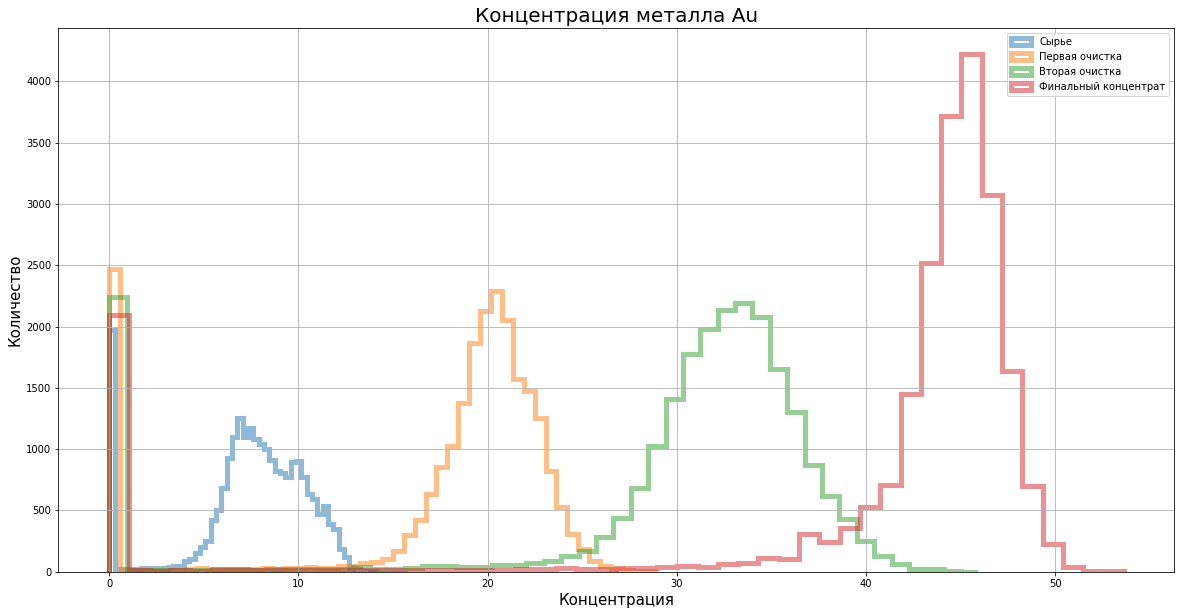

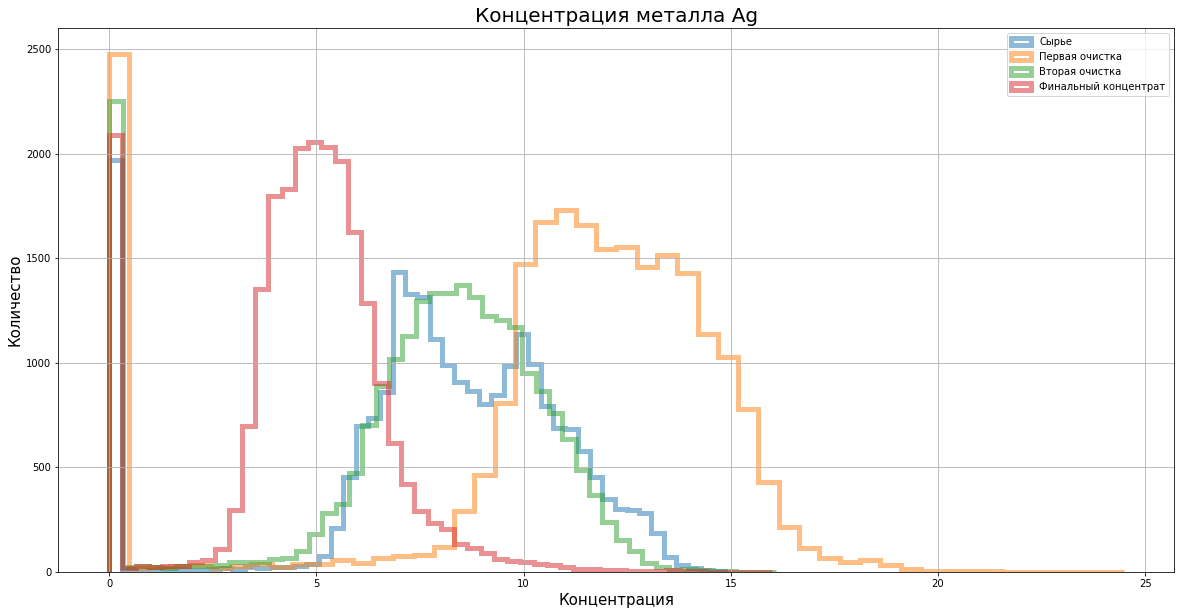

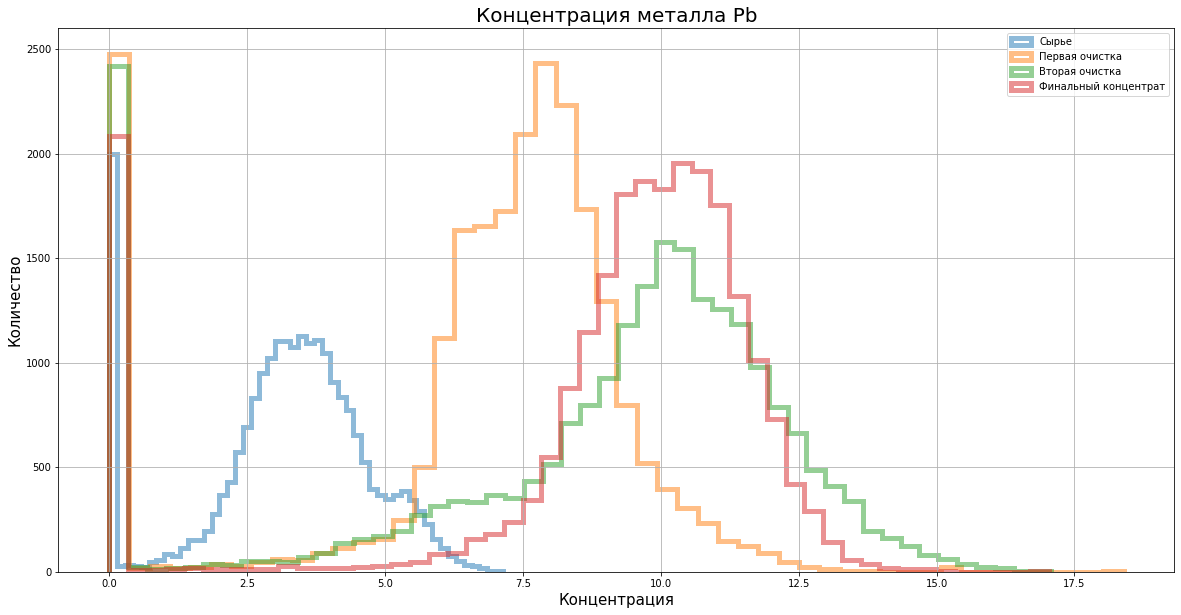

In [19]:
for column in ["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]:
    metal_au[column].hist(figsize=(20, 10), bins=50, alpha=0.5, linewidth=5, histtype='step')
plt.legend(['Сырье', 'Первая очистка', 'Вторая очистка', 'Финальный концентрат'])
plt.title("Концентрация металла Au", size=20)
plt.xlabel("Концентрация", size=15)
plt.ylabel("Количество", size=15)
plt.show()

for column in ["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]:
    metal_ag[column].hist(figsize=(20, 10), bins=50, alpha=0.5, linewidth=5, histtype='step')
plt.legend(['Сырье', 'Первая очистка', 'Вторая очистка', 'Финальный концентрат'])
plt.title("Концентрация металла Ag", size=20)
plt.xlabel("Концентрация", size=15)
plt.ylabel("Количество", size=15)
plt.show()

for column in ["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]:
    metal_pb[column].hist(figsize=(20, 10), bins=50, alpha=0.5, linewidth=5, histtype='step')
plt.legend(['Сырье', 'Первая очистка', 'Вторая очистка', 'Финальный концентрат'])
plt.title("Концентрация металла Pb", size=20)
plt.xlabel("Концентрация", size=15)
plt.ylabel("Количество", size=15)
plt.show()

### Шаги:
Построенные графики концентраций металлов Au, Ag и Pb на стадии очистки.

### Вывод:
Концентрация Au увеличивается равномерно на протяжении стадии очистки. Концентрация Ag увеличивается и немного уменьшается на протяжении стадии, что приводит к чистому снижению. Концентрация Pb незначительно увеличивается на протяжении стадии, что приводит к чистому увеличению, аналогичному увеличению выхода концентрата первичного более чистого.

======================================================================================================================

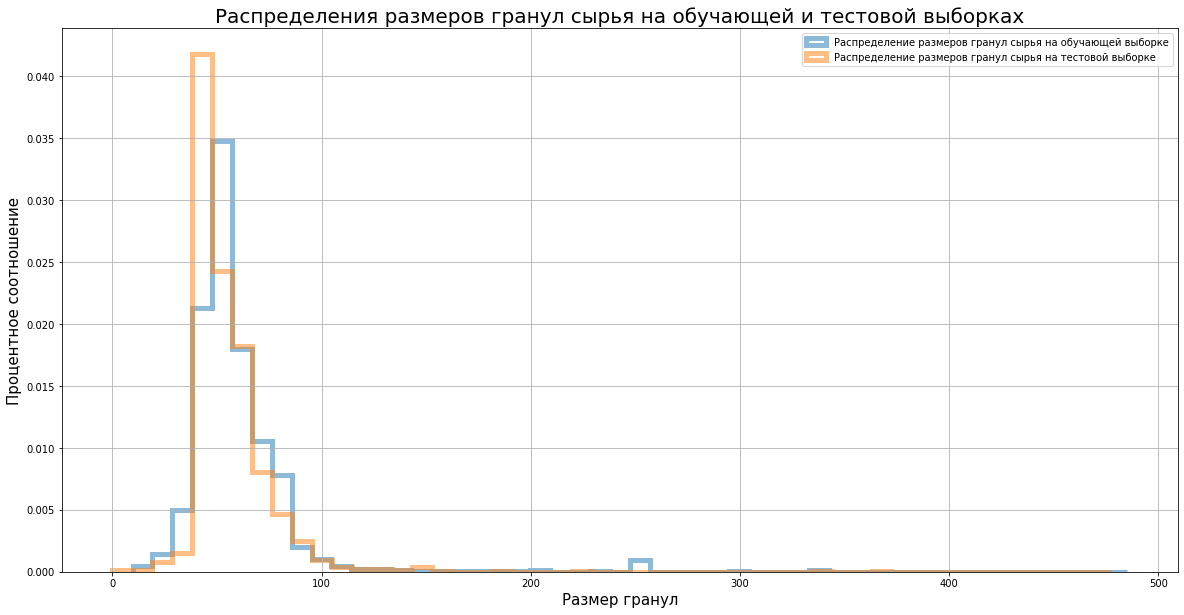

In [20]:
[i.hist(figsize=(20, 10), bins=50, density=True, alpha=0.5, linewidth=5, histtype='step') for i in [df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']]]
    
plt.legend(['Распределение размеров гранул сырья на обучающей выборке', 'Распределение размеров гранул сырья на тестовой выборке'])
plt.title("Распределения размеров гранул сырья на обучающей и тестовой выборках", size=20)
plt.xlabel("Размер гранул", size=15)
plt.ylabel("Процентное соотношение", size=15)
plt.show()

### Шаги:
Построенный график гранулометрического состава корма в поезде и испытательном наборе.

### Вывод:
Распределение частиц по размерам показывает, что размеры частиц существенно не меняются в серии и наборе для испытаний. Следовательно, оценка модели может быть правильной.

======================================================================================================================

In [21]:
def raw_feed(df):
    return df["rougher.input.feed_au"] + df["rougher.input.feed_ag"] + df["rougher.input.feed_pb"] + df["rougher.input.feed_sol"]

In [22]:
def rougher_conc(df):
    return df["rougher.output.concentrate_au"] + df["rougher.output.concentrate_ag"] + df["rougher.output.concentrate_pb"] + df["rougher.output.concentrate_sol"]

In [23]:
def final_conc(df):
    return df["final.output.concentrate_au"] + df["final.output.concentrate_ag"] + df["final.output.concentrate_pb"] + df["final.output.concentrate_sol"]

In [24]:
df_full["rougher.input.feed"] = raw_feed(df_full)
df_full["rougher.output.concentrate"] = rougher_conc(df_full)
df_full["final.output.concentrate"] = final_conc(df_full)
total_conc = df_full[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]

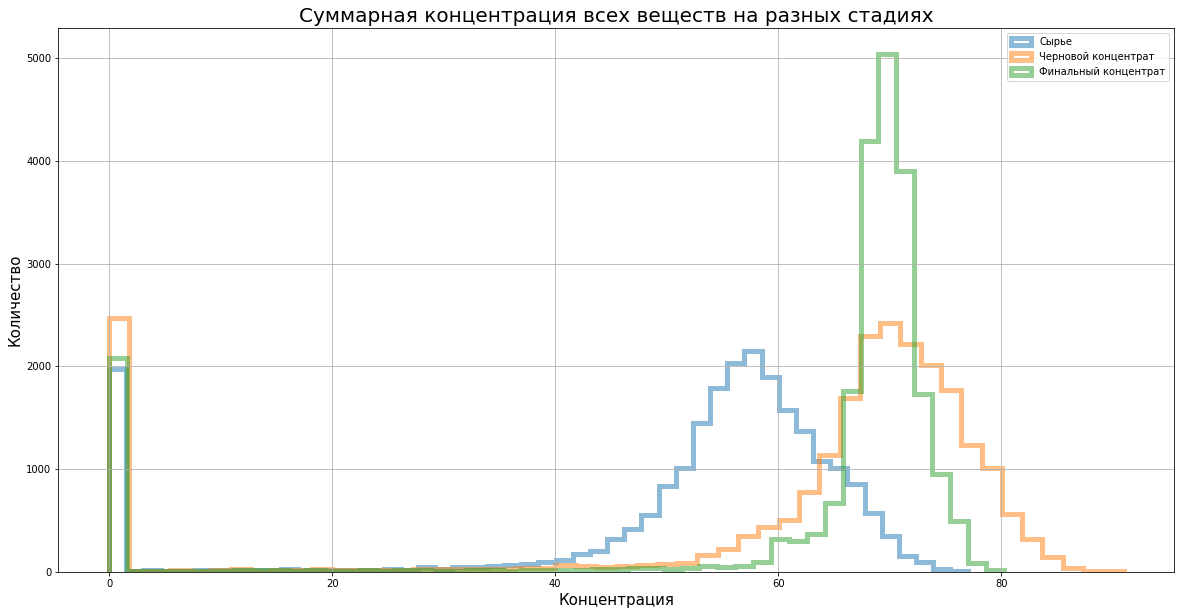

In [25]:
for column in ["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]:
    total_conc[column].hist(figsize=(20, 10), bins=50, alpha=0.5, linewidth=5, histtype='step')
    
plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат'])
plt.title("Суммарная концентрация всех веществ на разных стадиях", size=20)
plt.xlabel("Концентрация", size=15)
plt.ylabel("Количество", size=15)
plt.show()

In [26]:
df_train["rougher.input.feed"] = raw_feed(df_train)
df_train["rougher.output.concentrate"] = rougher_conc(df_train)
df_train["final.output.concentrate"] = final_conc(df_train)

In [27]:
df_train = df_train[(df_train["rougher.input.feed"] > 20) & (df_train["rougher.output.concentrate"] > 20) & (df_train["final.output.concentrate"] > 20)]
df_train = df_train.drop(["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"], axis=1)

In [28]:
df_test["rougher.input.feed"] = raw_feed(df_test)
df_test["rougher.output.concentrate"] = rougher_conc(df_test)
df_test["final.output.concentrate"] = final_conc(df_test)

In [29]:
df_test = df_test[(df_test["rougher.input.feed"] > 20) & (df_test["rougher.output.concentrate"] > 20) & (df_test["final.output.concentrate"] > 20)]
df_test = df_test.drop(["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"], axis=1)

In [30]:
df_test = df_test.drop(merge.columns, axis=1)

### Шаги:
Построено распределение общей концентрации металлов на разных этапах.

### Вывод:
Все распределения концентрации на различных этапах показывают аномальные значения при 0%. Поэтому стоит удалить эти значения из обоих образцов (<20%), чтобы обеспечить точность модели.

# 3. Модель

In [31]:
def final_smape(target, predict):
    target_rougher = target.iloc[:, 0]
    predict_rougher = predict[:, 0]

    rougher_num = np.abs(target_rougher - predict_rougher)
    rougher_den = (np.abs(target_rougher) + np.abs(predict_rougher)) / 2
    smape_rougher = np.mean(rougher_num / rougher_den) * 100

    target_final = target.iloc[:, 1]
    predict_final = predict[:, 1]

    final_num = np.abs(target_final - predict_final)
    final_den = (np.abs(target_final) + np.abs(predict_final)) / 2
    smape_final = np.mean(final_num / final_den) * 100

    final_smape = smape_rougher * 0.25 + smape_final * 0.75
    return final_smape

In [32]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

In [33]:
df_train = df_train[df_train.columns[df_train.columns.isin(df_test.columns)]]

In [34]:
features_train = df_train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = df_train[["rougher.output.recovery", "final.output.recovery"]]

In [35]:
features_test = df_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = df_test[["rougher.output.recovery", "final.output.recovery"]]

In [36]:
feature_scaler = StandardScaler()
features_train = feature_scaler.fit_transform(features_train)
features_test = feature_scaler.transform(features_test)

In [37]:
state = np.random.RandomState(12345)

In [38]:
print("Decision Tree")
for depth in range(100, 501, 100):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    model.fit(features_train, target_train)
    final_smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer)
    print("max_depth =", depth, ":", np.abs(np.average(final_smape)))

Decision Tree
max_depth = 100 : 15.794061935849621
max_depth = 200 : 16.254521001210076
max_depth = 300 : 15.135080380979385
max_depth = 400 : 15.343800904790394
max_depth = 500 : 15.146529976728013


In [39]:
print("Random Forest")
for estim in range(10, 51, 10):
    model = RandomForestRegressor(n_estimators=estim, random_state=state)
    model.fit(features_train, target_train)
    final_smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer)
    print("n_estimators =", estim, ":", np.abs(np.average(final_smape)))

Random Forest
n_estimators = 10 : 10.424875691994806
n_estimators = 20 : 10.531113005902535
n_estimators = 30 : 9.871037902189236
n_estimators = 40 : 9.79297455935692
n_estimators = 50 : 9.854387854154535


In [40]:
model = LinearRegression()
model.fit(features_train, target_train)
final_smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer)
print("Logistic Regression", ":", np.abs(np.average(final_smape)))

Logistic Regression : 10.620771419855895


In [41]:
model = RandomForestRegressor(n_estimators=40, random_state=state)
model.fit(features_train, target_train)
final_smape = cross_val_score(model, features_test, target_test, cv=5, scoring=smape_scorer)
print("sMAPE :", np.abs(np.average(final_smape)))

sMAPE : 6.957157984710861


In [42]:
constant_model_mean = target_train.mean()
constant_model_test = pd.DataFrame(index=range(len(target_test)),columns=["rougher.output.recovery", "final.output.recovery"])
constant_model_test["rougher.output.recovery"] = constant_model_mean[0]
constant_model_test["final.output.recovery"] = constant_model_mean[1]

In [44]:
constant_smape = final_smape(constant_model_test, target_test)
print("Константная модель sMAPE:", constant_smape)

Константная модель sMAPE: 7.620660008047318


### Шаги:
Данные отброшены в тренировочном процессе и на тестовом наборе концентрация <= 20% для удаления аномальных значений.
Обучил и подогнал модель с помощью DecisionTreeRegressor на разной глубине.
Обучил и подогнал модель с помощью RandomForestRegressor с различными n_estimator.
Обучил и подогнал модель с помощью LinearRegression.
Обучил и подогнал окончательную модель с помощью RandomForestRegressor с 40 n_estimators.
Определена постоянная модель, предсказывающая среднее значение.

### Вывод:
Лучшая из наблюдаемых моделей - использование RandomForestRegressor на 40 n_setimators. Окончательный найденный sMAPE составляет 8%. Постоянная модель, предсказывающая среднее значение, составляет 7,6%, что очень близко и указывает на то, что модель машинного обучения ненамного лучше, чем постоянная модель, предсказывающая среднее. Постоянная модель, предсказывающая среднее значение, также лучше, чем любая из других протестированных моделей.